In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from dython import nominal
sb.set() # set the default Seaborn style for graphics

In [2]:
#Importing the dataset
Data = pd.read_csv("data.csv")
Data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Renaming the columns for better readability

In [3]:
Data = Data.rename(columns={"Make":"Manufacturer", "Engine Fuel Type" : "FuelType" , "Engine HP": "HorsePower", "Engine Cylinders": "Cylinders", "Driven_Wheels": "DriveTrain" , "Number of Doors" : "Doors", "Market Category" : "Category","Vehicle Size": "Size","Vehicle Style":"Style","highway MPG": "HMPG", "city mpg": "CMPG", "MSRP": "Price" })
Data.head()

,Manufacturer,Model,Year,FuelType,HorsePower,Cylinders,Transmission Type,DriveTrain,Doors,Category,Size,Style,HMPG,CMPG,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Cleaning the data

Checking for NULL values in dataset.

In [4]:
Data.isnull().sum()

Manufacturer            0
Model                   0
Year                    0
FuelType                3
HorsePower             69
Cylinders              30
Transmission Type       0
DriveTrain              0
Doors                   6
Category             3742
Size                    0
Style                   0
HMPG                    0
CMPG                    0
Popularity              0
Price                   0
dtype: int64

In [5]:
Data.count()

Manufacturer         11914
Model                11914
Year                 11914
FuelType             11911
HorsePower           11845
Cylinders            11884
Transmission Type    11914
DriveTrain           11914
Doors                11908
Category              8172
Size                 11914
Style                11914
HMPG                 11914
CMPG                 11914
Popularity           11914
Price                11914
dtype: int64

### For now we will drop rows with null values for FuelType,HorsePower,Cylinders and doors considering the amount of rows with null values for these features is negligible compared to the amount of total data, 108 : 11914
### We will keep the null values in category for now before we decide if we should replace or drop the data.

In [6]:
Data = Data.dropna(subset = ['FuelType', 'HorsePower', 'Cylinders','Doors'])    # Dropping the missing values.
Data.count()

Manufacturer         11812
Model                11812
Year                 11812
FuelType             11812
HorsePower           11812
Cylinders            11812
Transmission Type    11812
DriveTrain           11812
Doors                11812
Category              8084
Size                 11812
Style                11812
HMPG                 11812
CMPG                 11812
Popularity           11812
Price                11812
dtype: int64

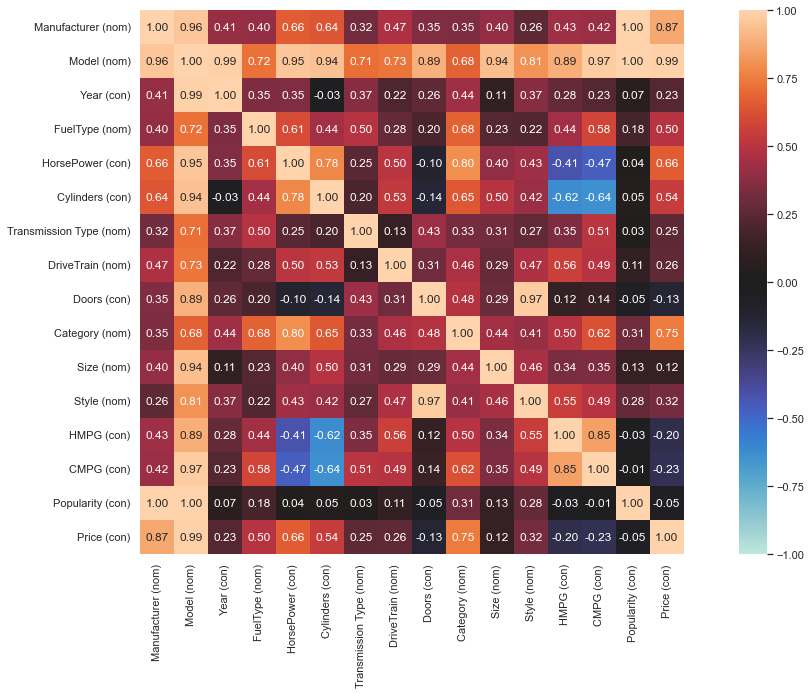

In [7]:
nominal.associations(Data,figsize=(20,10),mark_columns=True)
print()

# Looking at the correlation between price and category, we will not drop the null values of category as they have a strong linear relationship. Instead we will replace it with 'No category'

In [8]:
Data['Category'] = Data['Category'].replace(np.nan, 'No Category')

In [9]:
Data['Category'].value_counts()

No Category                                        3728
Crossover                                          1103
Flex Fuel                                           872
Luxury                                              851
Luxury,Performance                                  673
                                                   ... 
Crossover,Exotic,Luxury,High-Performance              1
Exotic,Luxury,High-Performance,Hybrid                 1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Crossover,Exotic,Luxury,Performance                   1
Name: Category, Length: 71, dtype: int64

In [10]:
Data.count()

Manufacturer         11812
Model                11812
Year                 11812
FuelType             11812
HorsePower           11812
Cylinders            11812
Transmission Type    11812
DriveTrain           11812
Doors                11812
Category             11812
Size                 11812
Style                11812
HMPG                 11812
CMPG                 11812
Popularity           11812
Price                11812
dtype: int64

## As we can see from the correlation heatmap between the variables and market price,few of the variables is irrevelant and we can drop the irrevelant data columns. We will be using 0.5 as a threshold in this context.

In [19]:
Data = Data.drop(['Year','FuelType', 'Transmission Type', 'DriveTrain', 'Doors', 'Size', 'Style','HMPG','CMPG','Popularity'], axis=1)

In [27]:
Data.head()

,Manufacturer,Model,HorsePower,Cylinders,Category,Price
0,BMW,1 Series M,335.0,6.0,"Factory Tuner,Luxury,High-Performance",46135
1,BMW,1 Series,300.0,6.0,"Luxury,Performance",40650
2,BMW,1 Series,300.0,6.0,"Luxury,High-Performance",36350
3,BMW,1 Series,230.0,6.0,"Luxury,Performance",29450
4,BMW,1 Series,230.0,6.0,Luxury,34500


In [28]:
Data.to_csv('cleaned_data.csv')